In [61]:
import h5py
from scipy.signal import detrend, decimate, butter, filtfilt
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, fftfreq, fftshift, ifft2, ifftshift

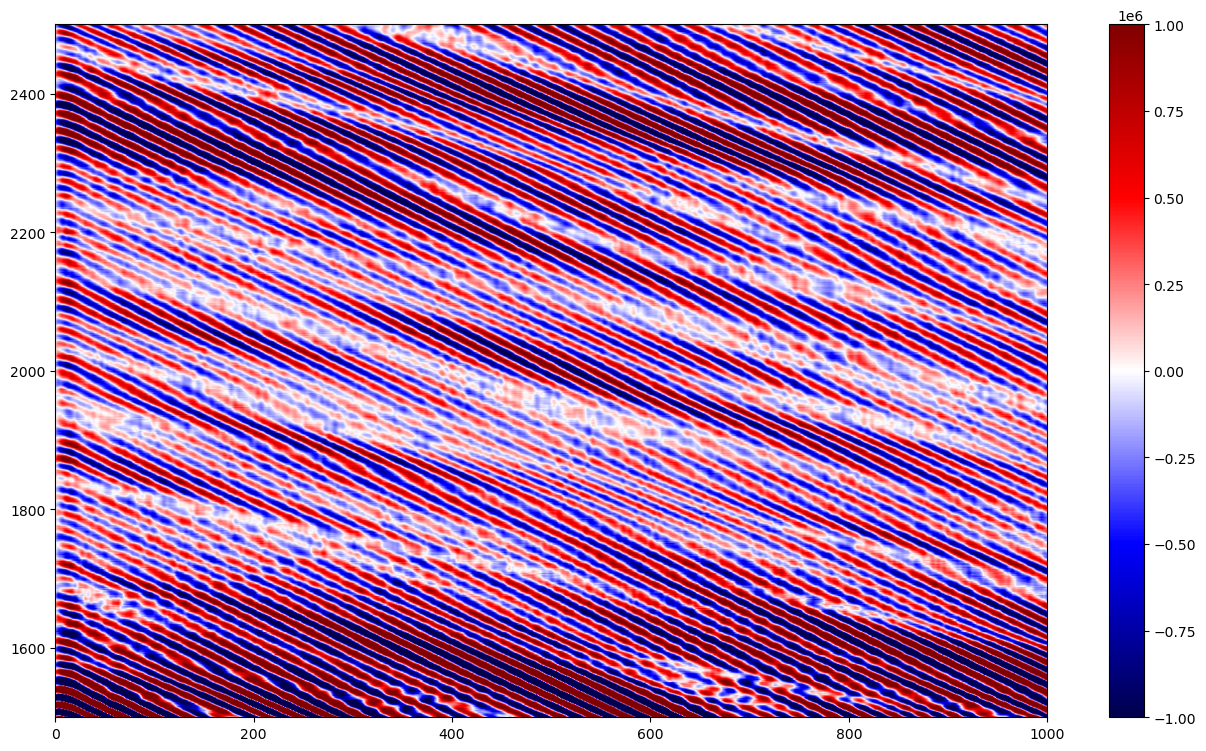

In [ ]:


path = "/data/fast0/ethan-scratch/OOI_South_2Hz/"
file = "OOI_South_2Hz_2021-11-02T000000.h5"

f = h5py.File(path + file, 'r')
data = np.array(f['/Data'])
f.close()

b,a = butter(2,[1/30/2, 0.5/2],'bandpass')
data_filt  = filtfilt(b,a,data)

vm = 1e6
fig,ax = plt.subplots(figsize=(16,9))
c=plt.imshow(data_filt[::10,:],cmap='seismic',aspect='auto',vmin=-vm,vmax=vm)
plt.ylim([1500,2500])
plt.xlim([0,1000])
plt.colorbar(c)

In [5]:
# !ls /data/fast0/ethan-scratch/OOI_South_2Hz

In [6]:
f = h5py.File(path + file, 'r')
data = np.array(f['/Data'])
f.close()


# f = h5py.File(path + file, 'r')
# data = np.array( f['/Acquisition/Raw[0]/RawData'] )
# f.close()

In [7]:
b,a = butter(2,[1/30/2, 0.5/2],'bandpass')
data_filt  = filtfilt(b,a,data)

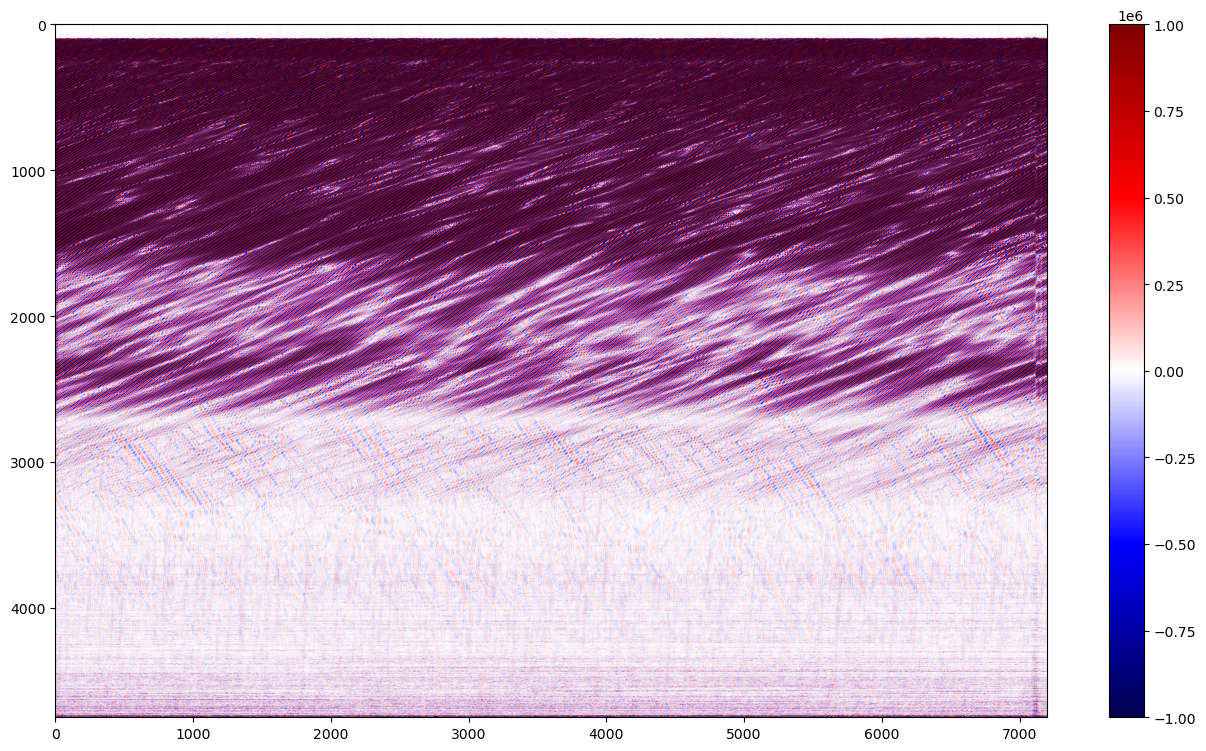

In [8]:
vm = 1e6
fig,ax = plt.subplots(figsize=(16,9))
c=plt.imshow(data_filt[::10,:],cmap='seismic',aspect='auto',vmin=-vm,vmax=vm)
# plt.ylim([1500,2500])
# plt.xlim([0,1000])
plt.colorbar(c)

In [21]:
ft.shape[0]

600

In [24]:


ft = fftshift(fft2(data[1800:2400,:]))
f = fftshift(fftfreq(ft.shape[1],1/2))
k = fftshift(fftfreq(ft.shape[0],2))

(600, 7200)


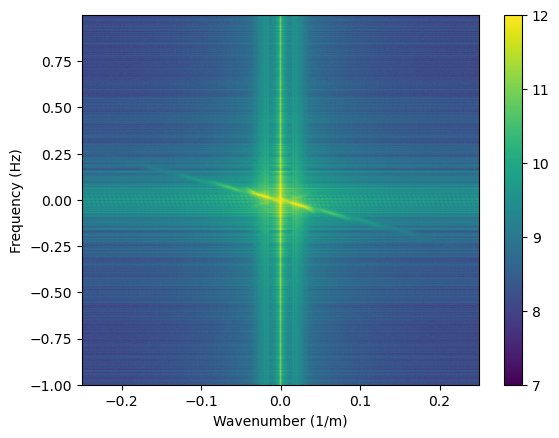

In [28]:
c=plt.imshow(np.log10(np.abs(ft)),aspect='auto',extent=[k[0],k[-1],f[0],f[-1]],
             vmin = 7,vmax=12)
plt.colorbar(c)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Wavenumber (1/m)')
print(ft.shape)

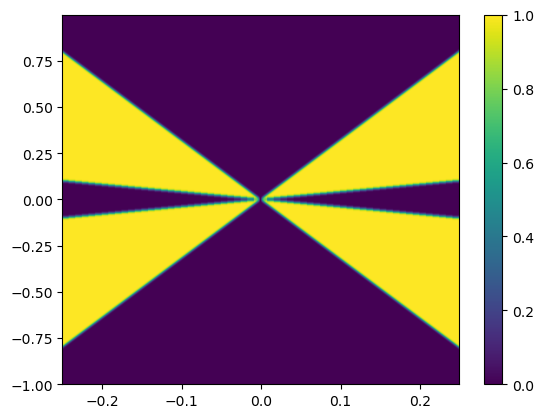

In [92]:
FF,KK=np.meshgrid(f,k)
filter = np.zeros_like(ft)
filter[ np.abs(FF) > 5*np.abs(KK) ] = 1
filter[ np.abs(FF) > 40*np.abs(KK) ] = 0

from scipy.ndimage import gaussian_filter
filter = gaussian_filter(filter,2)


plt.subplots()
c=plt.imshow(np.abs(filter),aspect='auto',extent=[k[0],k[-1],f[0],f[-1]],)
plt.colorbar(c)
plt.show()

In [93]:
data_fk_filt = ft*filter

/tmp/ipykernel_465731/3899332704.py:1: RuntimeWarning: divide by zero encountered in log10
  c=plt.imshow(np.log10(np.abs(data_fk_filt)),aspect='auto',extent=[k[0],k[-1],f[0],f[-1]],


(600, 7200)


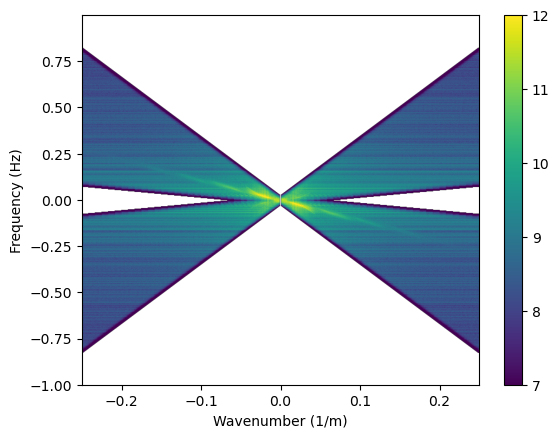

In [94]:
c=plt.imshow(np.log10(np.abs(data_fk_filt)),aspect='auto',extent=[k[0],k[-1],f[0],f[-1]],
             vmin = 7,vmax=12)
plt.colorbar(c)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Wavenumber (1/m)')
print(ft.shape)

In [95]:
data_fk = ifft2(ifftshift(data_fk_filt))

(0.0, 1000.0)

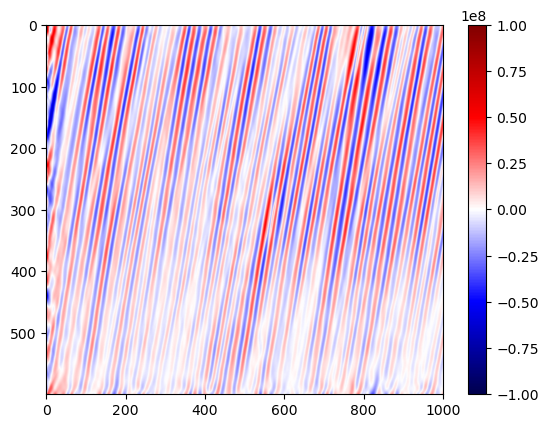

In [96]:
vm = 1e8
c=plt.imshow(np.real(data_fk),aspect='auto',cmap='seismic',vmin=-vm,vmax=vm)
plt.colorbar(c)
plt.xlim([0,1000])

In [ ]:
plt.plot()